## Collect ONNX results for different size of data

In [10]:
""" Prepare data"""

import os
import cv2
import numpy as np

rootdir = "data_flowers/daisy"
images_list = os.listdir(rootdir)
print(images_list) # all the image names in daisy flower

images = []

for image_name in images_list:
    img = cv2.imread(os.path.join(rootdir,image_name))
    img = cv2.resize(img, (240,240), interpolation = cv2.INTER_AREA) 
    img = np.reshape(img, (1,3,240,240))
    images.append(img.astype(np.float32))

['506018088_4f7a15a7c5_n.jpg', '5547758_eea9edfd54_n.jpg', '169371301_d9b91a2a42.jpg', '302782756_d35cb3e468.jpg', '144076848_57e1d662e3_m.jpg', '512177035_70afc925c8.jpg', '144603918_b9de002f60_m.jpg', '162362896_99c7d851c8_n.jpg', '7790614422_4557928ab9_n.jpg', '154332674_453cea64f4.jpg', '134409839_71069a95d1_m.jpg', '299129811_d6ebda9970.jpg', '413815348_764ae83088.jpg', '437859108_173fb33c98.jpg', '367020749_3c9a652d75.jpg', '7702332000_3f21ef4571_n.jpg', '286875003_f7c0e1882d.jpg', '172882635_4cc7b86731_m.jpg', '43474673_7bb4465a86.jpg', '147068564_32bb4350cc.jpg', '517054463_036db655a1_m.jpg', '301964511_fab84ea1c1.jpg', '100080576_f52e8ee070_n.jpg', '512477177_d9004cbcf1_n.jpg', '422094774_28acc69a8b_n.jpg', '515112668_a49c69455a.jpg', '476857510_d2b30175de_n.jpg', '21652746_cc379e0eea_m.jpg', '102841525_bd6628ae3c.jpg', '7924174040_444d5bbb8a.jpg', '163978992_8128b49d3e_n.jpg', '450128527_fd35742d44.jpg', '25360380_1a881a5648.jpg', '175106495_53ebdef092_n.jpg', '54377391_15648

In [11]:
import time
import onnxruntime as ort

session = ort.InferenceSession("onnx/model.onnx") #start onnx engine for our onnx model

input_name = session.get_inputs()[0].name
output_name = session.get_outputs()[0].name

onnx_results = []

""" Run inference for 1 image"""

start_inference = time.time()

scores = session.run([output_name], {input_name: images[0]})[0]

end_inference = time.time()

print("inference took", end_inference-start_inference, "seconds for 1 image")
onnx_results.append(end_inference-start_inference)

""" Run inference for 16 image"""

start_inference = time.time()

for image in images[0:16]:
    scores = session.run([output_name], {input_name: image})[0]

end_inference = time.time()

print("inference took", end_inference-start_inference, "seconds for 16 image")
onnx_results.append(end_inference-start_inference)

""" Run inference for 32 image"""

start_inference = time.time()

for image in images[0:32]:
    scores = session.run([output_name], {input_name: image})[0]

end_inference = time.time()

print("inference took", end_inference-start_inference, "seconds for 32 image")
onnx_results.append(end_inference-start_inference)

""" Run inference for 64 image"""

start_inference = time.time()

for image in images[0:64]:
    scores = session.run([output_name], {input_name: image})[0]

end_inference = time.time()

print("inference took", end_inference-start_inference, "seconds for 64 image")
onnx_results.append(end_inference-start_inference)

inference took 0.004163503646850586 seconds for 1 image
inference took 0.06167292594909668 seconds for 16 image
inference took 0.12746810913085938 seconds for 32 image
inference took 0.2308216094970703 seconds for 64 image


## Collect OpenVINO results for different size of data

## OpenVINO in OpenVINO runtime

In [12]:
from openvino.runtime import Core

# Load the network in OpenVINO Runtime.
ie = Core()
model_ir = ie.read_model(model="openvino/model.xml")
compiled_model_ir = ie.compile_model(model=model_ir, device_name="CPU")

# Get input and output layers.
output_layer_ir = compiled_model_ir.output(0)

openvino_results = []

""" Run inference for 1 image"""

start_inference = time.time()
scores = compiled_model_ir([images[0]])[output_layer_ir]
end_inference = time.time()
print("inference took", end_inference-start_inference, "seconds for 1 image")
openvino_results.append(end_inference-start_inference)

""" Run inference for 16 image"""

start_inference = time.time()
for image in images[0:16]:
    scores = compiled_model_ir([image])[output_layer_ir]
end_inference = time.time()
print("inference took", end_inference-start_inference, "seconds for 16 image")
openvino_results.append(end_inference-start_inference)

""" Run inference for 32 image"""

start_inference = time.time()
for image in images[0:32]:
    scores = compiled_model_ir([image])[output_layer_ir]
end_inference = time.time()
print("inference took", end_inference-start_inference, "seconds for 32 image")
openvino_results.append(end_inference-start_inference)

""" Run inference for 64 image"""

start_inference = time.time()
for image in images[0:64]:
    scores = compiled_model_ir([image])[output_layer_ir]
end_inference = time.time()
print("inference took", end_inference-start_inference, "seconds for 64 image")
openvino_results.append(end_inference-start_inference)



inference took 0.006293296813964844 seconds for 1 image
inference took 0.06717920303344727 seconds for 16 image
inference took 0.11652445793151855 seconds for 32 image
inference took 0.23731231689453125 seconds for 64 image


### ONNX in OpenVINO runtime

In [13]:
# Load the network to OpenVINO Runtime.
ie = Core()
model_onnx = ie.read_model(model="onnx/model.onnx")
compiled_model_onnx = ie.compile_model(model=model_onnx, device_name="CPU")

output_layer_onnx = compiled_model_onnx.output(0)

onnx_openvino_results = []

""" Run inference for 1 image"""

start_inference = time.time()
res_onnx = compiled_model_onnx([images[0]])[output_layer_onnx]
end_inference = time.time()
print("inference took", end_inference-start_inference, "seconds for 1 image")
onnx_openvino_results.append(end_inference-start_inference)

""" Run inference for 16 image"""

start_inference = time.time()
for image in images[0:16]:
    scores = compiled_model_onnx([image])[output_layer_onnx]
end_inference = time.time()
print("inference took", end_inference-start_inference, "seconds for 16 image")
onnx_openvino_results.append(end_inference-start_inference)

""" Run inference for 32 image"""

start_inference = time.time()
for image in images[0:32]:
    scores = compiled_model_onnx([image])[output_layer_onnx]
end_inference = time.time()
print("inference took", end_inference-start_inference, "seconds for 32 image")
onnx_openvino_results.append(end_inference-start_inference)

""" Run inference for 64 image"""

start_inference = time.time()
for image in images[0:64]:
    scores = compiled_model_onnx([image])[output_layer_onnx]
end_inference = time.time()
print("inference took", end_inference-start_inference, "seconds for 64 image")
onnx_openvino_results.append(end_inference-start_inference)


inference took 0.0053174495697021484 seconds for 1 image
inference took 0.0933530330657959 seconds for 16 image
inference took 0.15446853637695312 seconds for 32 image
inference took 0.40591859817504883 seconds for 64 image


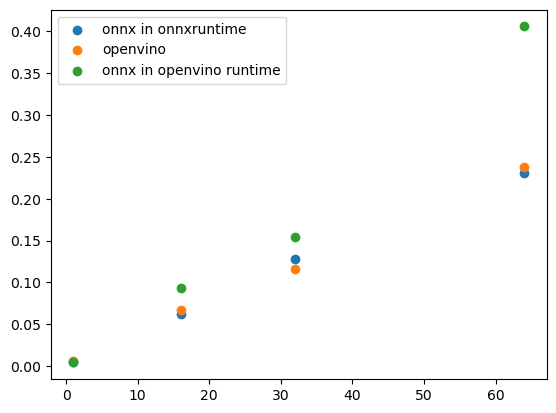

In [14]:
import matplotlib.pyplot as plt

plt.scatter([1,16,32,64], onnx_results, label='onnx in onnxruntime')
plt.scatter([1,16,32,64], openvino_results, label='openvino')
plt.scatter([1,16,32,64], onnx_openvino_results, label='onnx in openvino runtime')
plt.legend()
plt.show()

We see that onnx in openvino runtime gives the worst result while its still better than PyTorch inference. We also see that onnx openvino keeps its inference time stable while openvino and onnx gets faster with increasing number of given data. 

### Inference in Batchs

### ONNX in onnxruntime

In [15]:
import torch
from networkFT import Net

""" Loading the trained model"""
model = Net(3) 
model.load_state_dict(torch.load('./outputs_FT/model.pt'))

""" create an example input having same shape with the expected input for the trained model"""

x = torch.randn((64, 3, 240, 240))

""" convert it to onnx"""
torch.onnx.export(model,       # model to convert
                  x,         # model input
                  "onnx/model64.onnx",  # output model name
                  export_params=True, # store the trained weights
                  opset_version=11,   # the ONNX version
                  do_constant_folding=True, # remove randomness, make inference faster
                  input_names= ['input'], # set model input names    
                  output_names=['output'], # set model output names
)

session = ort.InferenceSession("onnx/model64.onnx") #start onnx engine for our onnx model

input_name = session.get_inputs()[0].name
output_name = session.get_outputs()[0].name


print(np.array(images).shape)
images = np.array(images).reshape(64,3,240,240)
print(np.array(images).shape)


start_inference = time.time()

scores = session.run([output_name], {input_name: images})[0]

end_inference = time.time()
print("inference took", end_inference-start_inference, "seconds for batch of 64 image")



(64, 1, 3, 240, 240)
(64, 3, 240, 240)
inference took 0.06395936012268066 seconds for batch of 64 image


### OpenVINO in OpenVINO runtime

In [16]:
!mo --input_model "onnx/model64.onnx" --input_shape "[64, 3, 240, 240]" --data_type FP32 --output_dir "openvino/"

[ WARNING ]  Use of deprecated cli option --data_type detected. Option use in the following releases will be fatal. 
[ INFO ] The model was converted to IR v11, the latest model format that corresponds to the source DL framework input/output format. While IR v11 is backwards compatible with OpenVINO Inference Engine API v1.0, please use API v2.0 (as of 2022.1) to take advantage of the latest improvements in IR v11.
Find more information about API v2.0 and IR v11 at https://docs.openvino.ai/latest/openvino_2_0_transition_guide.html
[ SUCCESS ] Generated IR version 11 model.
[ SUCCESS ] XML file: /home/yca/educative/docker_image_jp/openvino/model64.xml
[ SUCCESS ] BIN file: /home/yca/educative/docker_image_jp/openvino/model64.bin


In [17]:
from openvino.runtime import Core

# Load the network in OpenVINO Runtime.
ie = Core()
model_ir = ie.read_model(model="openvino/model64.xml")
compiled_model_ir = ie.compile_model(model=model_ir, device_name="CPU")

# Get input and output layers.
output_layer_ir = compiled_model_ir.output(0)

start_inference = time.time()
scores = compiled_model_ir([images])[output_layer_ir]
end_inference = time.time()
print("inference took", end_inference-start_inference, "seconds for batch of 64 image")

inference took 0.09828066825866699 seconds for batch of 64 image


### ONNX in OpenVINO runtime

In [18]:
ie = Core()
model_onnx = ie.read_model(model="onnx/model64.onnx")
compiled_model_onnx = ie.compile_model(model=model_onnx, device_name="CPU")

output_layer_onnx = compiled_model_onnx.output(0)

start_inference = time.time()
scores = compiled_model_onnx([images])[output_layer_onnx]
end_inference = time.time()
print("inference took", end_inference-start_inference, "seconds for batch of 64 image")

inference took 0.08121919631958008 seconds for batch of 64 image


### Conclusion

As you see, we can make our inference with batchs (any batch size, it can be different than our training model batch size), and it makes our inference way faster. For example for each case, if we infer 64 images 1 by 1, it's 5x slower than infering 64 images as batchs. Final result doesn't seem to be changed though, still we have a winner (onnx in onnxruntime), a second (onnx in openvino runtime) and a loser(openvino in openvino)! Note that the performance of these frameworks may change depending on yoru hardware and the model you want to convert, so I suggest you to check all these options to find the best before deploying it ;)